In [2]:
from sqlalchemy import create_engine
import pymysql

db_connection_str = 'mysql+pymysql://<your_account>:<your_password>@<your_ip>/ML_data'
db_connection = create_engine(db_connection_str)

df = pd.read_sql('SELECT * FROM datas', con=db_connection)
df = df.set_index('player_name')

df.tail(2)

,position,age,height,weight,rating,value,follower,shots_total,shots_on,goals_total,...,penalty_commited,penalty_success,penalty_missed,penalty_saved,games_appearences,games_lineups,substitutes_in,substitutes_out,substitutes_bench,games_played
player_name,,,,,,,,,,,,,,,,,,,,,
Y. Poulsen,4.0,26.0,192.0,84.0,6.54545,24.0,109000,2.0141,0.7524,0.3357,...,0.0,0.0116,0.0,0.0,1.4006,0.9492,0.4514,0.2894,0.5788,86.3889
Y. Tielemans,2.0,23.0,176.0,72.0,4.38462,44.0,282254,1.6977,0.6011,0.1476,...,0.0,0.0105,0.0,0.0,1.2021,1.0334,0.1687,0.3058,0.2636,94.8333


In [3]:
df_nofollower = df.drop(columns=['follower'])

###### Follower X

In [4]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_nofollower)):
    df_train = df_nofollower.iloc[idx_train]
    df_test = df_nofollower.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = DecisionTreeRegressor(random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = -0.89446480
mse = 603.45394737
R2 Score = -1.19070147
R2 = 0.30853217
mse = 269.26973684
R2 Score = -2.12504468
R2 = -1.32403886
mse = 572.41891892
R2 Score = -3.04911333
R2 = -1.83632160
mse = 684.59459459
R2 Score = -3.92941048
R2 = -0.56000386
mse = 714.50000000
R2 Score = -9.34585012
R2 = -0.23901061
mse = 1328.31756757
R2 Score = -0.09429939
R2 = 0.33984720
mse = 298.47297297
R2 Score = -1.38314953
R2 = -0.14554549
mse = 1022.65540541
R2 Score = -6.38403912
R2 = -1.15299747
mse = 681.71621622
R2 Score = 0.01636948
R2 = -1.78738916
mse = 1066.47972973
R2 Score = -0.24205958
모델 성능 : Metrics R2 = -0.7291392472623006, R2 Score = -2.7727298232756565, mse = 724.1879089615932


In [5]:
scores_rm

array([[-8.94464796e-01,  3.08532168e-01, -1.32403886e+00,
        -1.83632160e+00, -5.60003860e-01, -2.39010606e-01,
         3.39847196e-01, -1.45545493e-01, -1.15299747e+00,
        -1.78738916e+00],
       [ 6.03453947e+02,  2.69269737e+02,  5.72418919e+02,
         6.84594595e+02,  7.14500000e+02,  1.32831757e+03,
         2.98472973e+02,  1.02265541e+03,  6.81716216e+02,
         1.06647973e+03],
       [-1.19070147e+00, -2.12504468e+00, -3.04911333e+00,
        -3.92941048e+00, -9.34585012e+00, -9.42993909e-02,
        -1.38314953e+00, -6.38403912e+00,  1.63694750e-02,
        -2.42059579e-01]])

In [7]:
pd.DataFrame(model.feature_importances_, index=df_nofollower.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

,Feature_Importances
goals_total,0.170280
dribbles_success,0.142379
goals_assists,0.113364
substitutes_out,0.065057
games_played,0.057360
rating,0.043630
passes_total,0.042333
passes_key,0.034675
duels_won,0.030715
shots_on,0.030659


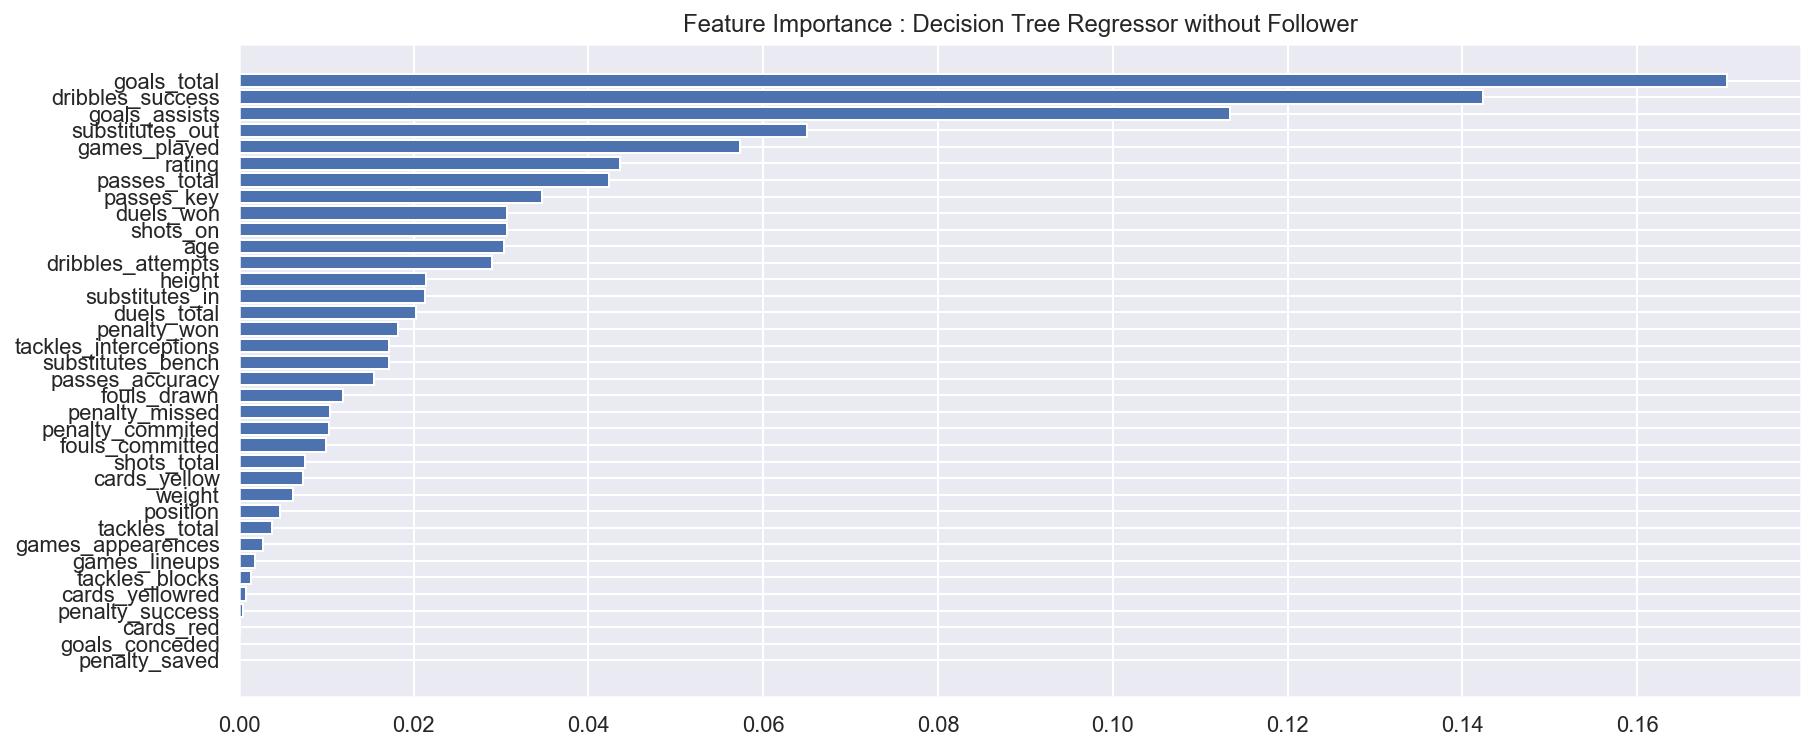

In [10]:
from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(14,6))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Feature Importance : Decision Tree Regressor without Follower")
    plt.show()

f_importances(model.feature_importances_, df_nofollower.drop('value', axis=1).columns)

###### Follower O

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = DecisionTreeRegressor(random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = 0.00219691
mse = 317.83552632
R2 Score = -1.43427109
R2 = -1.01672627
mse = 785.34868421
R2 Score = -46.30356968
R2 = -0.78712712
mse = 440.17567568
R2 Score = -0.27951345
R2 = -2.58554496
mse = 865.43243243
R2 Score = -0.23558589
R2 = -0.09815149
mse = 502.96621622
R2 Score = -1.99893504
R2 = 0.20812505
mse = 848.95270270
R2 Score = -0.14290411
R2 = 0.18917801
mse = 366.59459459
R2 Score = -0.13666913
R2 = -0.54875286
mse = 1382.60810811
R2 Score = -1.83482641
R2 = -0.46578980
mse = 464.12162162
R2 Score = -0.52323493
R2 = -0.85448027
mse = 709.54054054
R2 Score = -3.20267272
모델 성능 : Metrics R2 = -0.5957072796725664, R2 Score = -5.609218245590584, mse = 668.3576102418208


In [12]:
scores_rm

array([[ 2.19690629e-03, -1.01672627e+00, -7.87127120e-01,
        -2.58554496e+00, -9.81514885e-02,  2.08125053e-01,
         1.89178011e-01, -5.48752862e-01, -4.65789798e-01,
        -8.54480266e-01],
       [ 3.17835526e+02,  7.85348684e+02,  4.40175676e+02,
         8.65432432e+02,  5.02966216e+02,  8.48952703e+02,
         3.66594595e+02,  1.38260811e+03,  4.64121622e+02,
         7.09540541e+02],
       [-1.43427109e+00, -4.63035697e+01, -2.79513449e-01,
        -2.35585893e-01, -1.99893504e+00, -1.42904107e-01,
        -1.36669133e-01, -1.83482641e+00, -5.23234931e-01,
        -3.20267272e+00]])

In [13]:
pd.DataFrame(model.feature_importances_, index=df.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

,Feature_Importances
follower,0.291937
dribbles_success,0.130949
passes_accuracy,0.123727
games_played,0.066861
substitutes_bench,0.056203
duels_won,0.039197
age,0.038444
duels_total,0.038317
substitutes_in,0.029475
goals_assists,0.018123


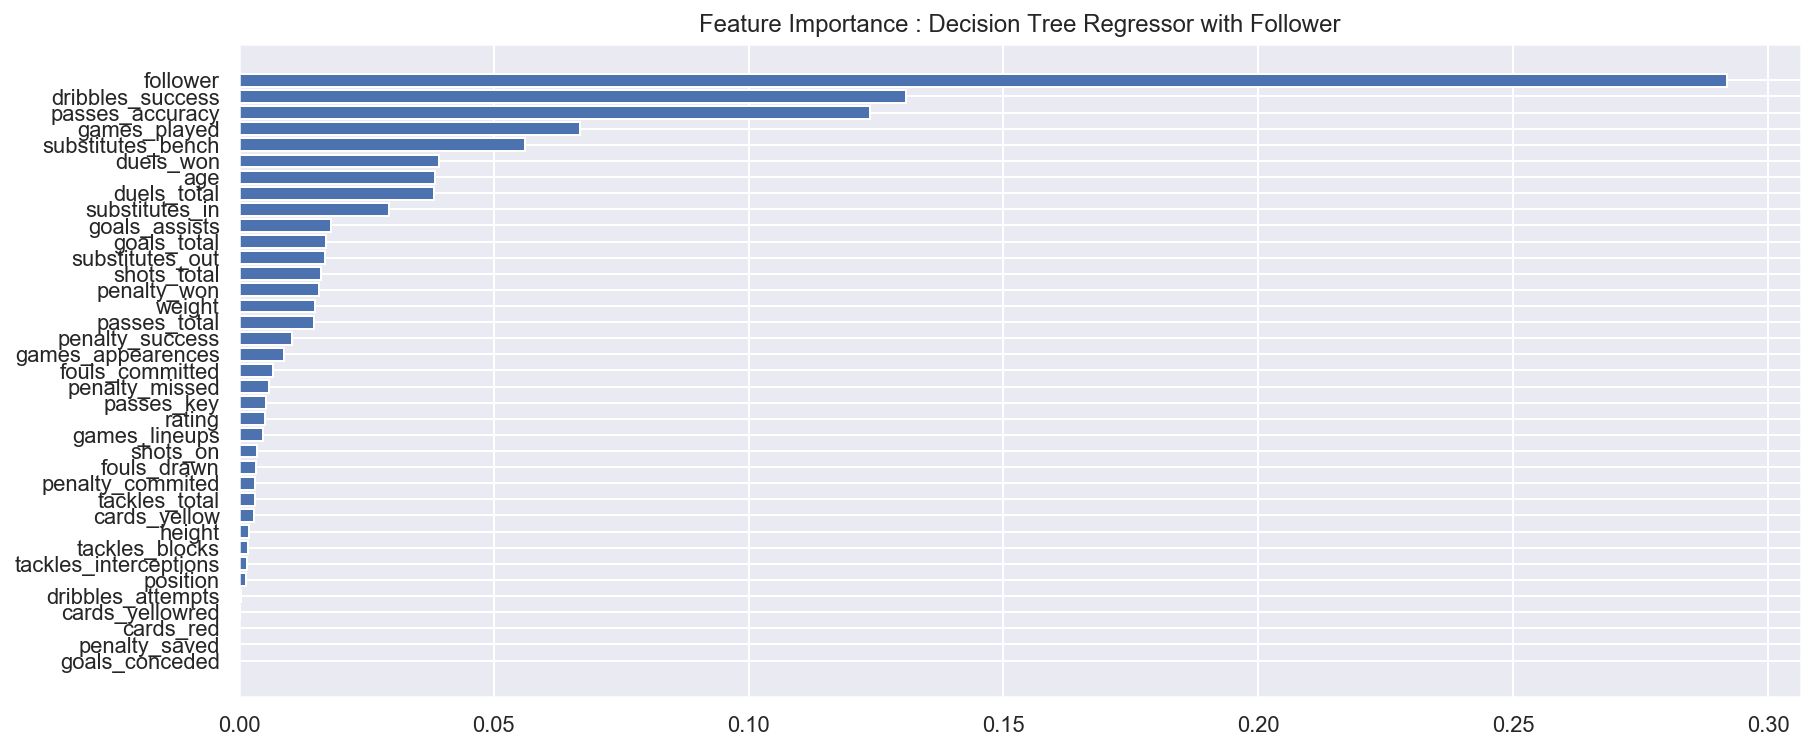

In [15]:
from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(14,6))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Feature Importance : Decision Tree Regressor with Follower")
    plt.show()

f_importances(model.feature_importances_, df.drop('value', axis=1).columns)